In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

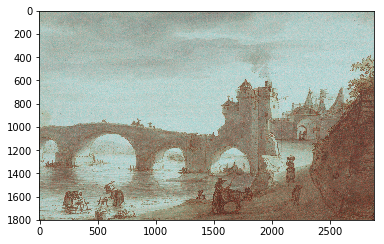

In [50]:
I = np.array(Image.open('image.png'))
plt.imshow(I)

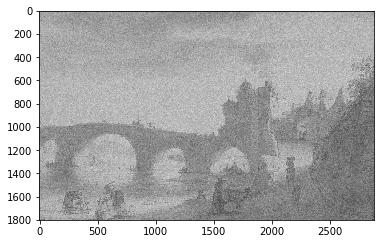

In [53]:
R = I[:, :, 0]
G = I[:, :, 1]
B = I[:, :, 2]
plt.imshow(R, cmap='gray')

[[121 160 153 ..., 154 130 137]
 [100 147 252 ..., 252 253 157]
 [153 157 253 ..., 253 154 149]
 ..., 
 [162 158 161 ..., 253 178 191]
 [164 253 253 ..., 253 183 196]
 [162 153 143 ..., 170 174 166]]


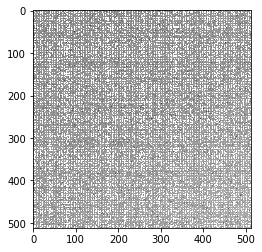

In [46]:
z = np.fft.fft2(R)
q = np.fft.fftshift(z)
magnitude_q = np.log(np.abs(q))[:512, :512]
magnitude_q = 255 / (np.max(magnitude_q) - np.min(magnitude_q)) * (magnitude_q - np.min(magnitude_q))
magnitude_q = magnitude_q.astype(np.uint8)
print(magnitude_q)
plt.imshow(magnitude_q, cmap='gray')

In [47]:
def reverse_bits_pas_shift(v):
    v = ((v >>  1) & 0x55555555) | ((v & 0x55555555) <<  1) # swap odd and even bits
    v = ((v >>  2) & 0x33333333) | ((v & 0x33333333) <<  2) # swap consecutive pairs
    v = ((v >>  4) & 0x0F0F0F0F) | ((v & 0x0F0F0F0F) <<  4) # swap nibbles ... 
    v = ((v >>  8) & 0x00FF00FF) | ((v & 0x00FF00FF) <<  8) # swap bytes
    v = ( v >> 16              ) | (v                << 16) # swap 2-byte long pairs
    return v >> 23

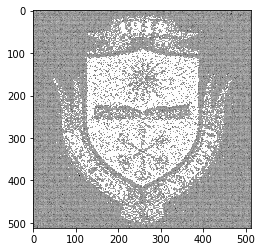

In [48]:
reversed_image = np.zeros((512, 512))
for i in range(reversed_image.shape[0]):
    for j in range(reversed_image.shape[1]):
        i_new = reverse_bits_pas_shift(i)
        j_new = reverse_bits_pas_shift(j)
        reversed_image[i_new, j_new] = magnitude_q[i, j];
plt.imshow(reversed_image, cmap='gray')